In [21]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [22]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [23]:
logdir = "log"

In [24]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60_000, 28, 28, 1))
test_images = test_images.reshape((10_000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = list(range(10))

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [27]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.1480 - accuracy: 0.9547 - val_loss: 0.0636 - val_accuracy: 0.9807
Epoch 2/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0404 - val_accuracy: 0.9876
Epoch 3/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0327 - val_accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0357 - val_accuracy: 0.9898
Epoch 5/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0370 - val_accuracy: 0.9888


In [29]:
y_true = test_labels
y_pred=model.predict(test_images) 
y_classes=np.argmax(y_pred,axis=1)


313/313 [==============================] - 4s 14ms/step


In [30]:
classes = list(range(10))

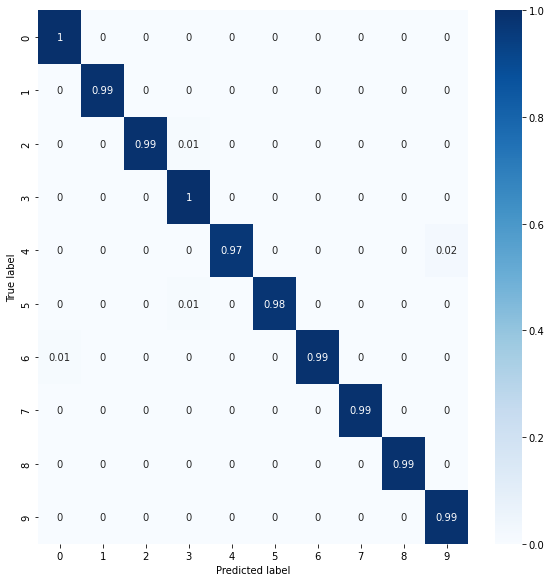

In [34]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_classes).numpy()
con_mat_norm = np.around(con_mat.astype("float") / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [35]:
con_mat

array([[ 976,    1,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1129,    1,    2,    0,    0,    0,    1,    2,    0],
       [   2,    1, 1017,    6,    0,    0,    0,    5,    1,    0],
       [   0,    0,    1, 1008,    0,    1,    0,    0,    0,    0],
       [   0,    1,    2,    0,  950,    0,    3,    3,    0,   23],
       [   1,    0,    0,   10,    0,  876,    1,    0,    2,    2],
       [   5,    2,    0,    0,    1,    2,  945,    0,    3,    0],
       [   0,    1,    1,    0,    0,    0,    0, 1022,    1,    3],
       [   1,    0,    2,    1,    0,    0,    0,    2,  966,    2],
       [   0,    2,    0,    1,    1,    2,    0,    0,    4,  999]],
      dtype=int32)

In [68]:
f1s = [0, 0, 0]

y_true = tf.cast(y_true, tf.float64)
y_pred = tf.cast(y_pred, tf.float64)

for i, axis in enumerate([None, 0]):
    TP = tf.math.count_nonzero(y_classes * y_true, axis=axis)
    TN = tf.math.count_nonzero((y_classes - 1) * (y_true - 1), axis=axis)
    FP = tf.math.count_nonzero(y_classes * (y_true - 1), axis=axis)
    FN = tf.math.count_nonzero((y_classes - 1) * y_true, axis=axis)

    acuracia = (TP+TN)/(TP+TN+FP+FN)
    sensibilidade = TP / (TP + FN)
    especificidade = TN / (FP+TN)
    precisao = TP / (TP + FP)
    f1 = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)


In [70]:
acuracia.numpy()

0.5312797335870599

In [71]:
sensibilidade.numpy()

0.5333530630364013

In [72]:
especificidade.numpy()

0.5291868315707714

In [73]:
precisao.numpy()

0.5334793677106151

In [74]:
f1.numpy()

0.5334162078967619